# 关于Fiske Guide to colleges 2025.pdf
这个notebook主要是解析Fiske Guide to colleges 2025.pdf的，把里面每所大学的基本信息提取出来。
需求文档在这里: [The Fiske Guide内容数字化](https://u02ep7zk8k2.feishu.cn/wiki/G5FDwkJP8ixOj5kanZZcBiJKnAd). 

1. Page 44 is the beginning of colleges introduction 1 by 1, ends at 849(blank page).
1. Index is in page 807(850), 808, 809
2. The New York University is in page 536, 537, 538

In [ ]:
import pdfplumber

def extract_text_using_pdfplumber(pdf_path):
    all_text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            all_text += text if text else ""
    return all_text



In [ ]:
pdf_path = "Fiske Guide to Colleges 2025.pdf"
extracted_text = extract_text_using_pdfplumber(pdf_path)

In [ ]:
print(extracted_text[:10000])

In [ ]:
len(extracted_text)

In [ ]:
with open('fiske_guide__to_colleges_2025.txt', 'w') as f:
    f.write(extracted_text)

In [ ]:
import PyPDF2

# 打开原始PDF文件
with open("Fiske Guide to Colleges 2025.pdf", 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    writer = PyPDF2.PdfWriter()

    # 指定要提取的页面编号，这里示例提取第2、5、8页，可根据实际需求修改
    pages_to_extract = [535, 536, 537]  # 注意Python中列表索引从0开始，所以这里实际对应第2、5、8页
    for page_num in pages_to_extract:
        page = reader.pages[page_num]
        writer.add_page(page)

    # 将提取的页面保存为新的PDF文件
    with open('extracted_pages.pdf', 'wb') as output_file:
        writer.write(output_file)

In [ ]:
nyu_txt = extract_text_using_pdfplumber("fiske_new_york_university.pdf")
with open('fiske_new_york_university.txt', 'w') as f:
    f.write(nyu_txt)

# 转换成html格式

In [ ]:
# strip pages, keep university introduction pages only.
# conver it into html via https://cloudconvert.com/pdf-to-html
import PyPDF2

# 打开原始PDF文件
with open("Fiske Guide to Colleges 2025.pdf", 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    writer = PyPDF2.PdfWriter()

    # 指定要提取的页面编号，这里示例提取第2、5、8页，可根据实际需求修改
    pages_to_extract = [535, 536, 537]  # 注意Python中列表索引从0开始，所以这里实际对应第2、5、8页
    for page_num in range(43, 849):
        page = reader.pages[page_num]
        writer.add_page(page)

    # 将提取的页面保存为新的PDF文件
    with open('stripped_pages.pdf', 'wb') as output_file:
        writer.write(output_file)

# 遍历html的元素

In [ ]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>示例网页</title></head>
<body>
<p class="para">这是一个段落。</p>
<div id="container">
    <p>另一个段落。</p>
</div>
</body></html>
"""
soup = BeautifulSoup(html_doc, 'lxml')

# 方法一：通过递归遍历所有子孙节点
def recursive_traversal(element):
    print(element.name)  # 打印元素标签名
    for child in element.children:
        if child.name:
            recursive_traversal(child)

recursive_traversal(soup.html)

# 方法二：使用find_all方法获取所有元素（会返回一个列表包含所有符合条件的元素）
all_elements = soup.find_all(True)
for element in all_elements:
    print(element.name)

# Fiske 内容抽取从这里开始

依次运行下面的单元格就能拿到最终想要的json文件.

In [ ]:

from bs4 import BeautifulSoup
from lxml import etree
import json

nyu = BeautifulSoup(open('fiske_new_york_university.html'))
pages = nyu.find_all("div", "pf")
all_universities = BeautifulSoup(open('Fiske_stripped_pages.html'))
all_pages = all_universities.find_all("div", "pf")
len(pages), len(pages[0].find_all("div")), len(pages[0].select("div")), len(list(pages[0].children))

In [ ]:
# left样式字典 from fiske_new_york_university.html, 用于计算html element的left值，判断是sidebar还是content。
left_dict = {
    "x0": 0.000000,
    "x14": 15.000000,
    "x1c": 48.600000,
    "x15": 51.000000,
    "x4": 94.500000,
    "x2": 105.000000,
    "x3": 108.000000,
    "x5": 121.503750,
    "x17": 243.000000,
    "x1a": 246.820800,
    "x1b": 252.001800,
    "x18": 270.003750,
    "x12": 426.820800,
    "x13": 432.199800,
    "x19": 474.006750,
    "x16": 610.144050,
    "x1": 616.107750,
    "x7": 675.823650,
    "x6": 676.907400,
    "x11": 683.872050,
    "x21": 685.673100,
    "x1f": 687.863100,
    "x22": 689.948100,
    "x20": 705.488100,
    "x1e": 710.453100,
    "x1d": 712.684800,
    "xb": 714.038700,
    "xa": 715.821000,
    "xc": 718.682700,
    "x23": 725.918100,
    "xd": 733.010700,
    "xe": 737.654700,
    "x8": 744.306150,
    "xf": 751.982700,
    "x10": 756.626700,
    "x9": 827.645850
}

# left样式字典 from Fiske_stripped_pages.html, 用于计算html element的left值，判断是sidebar还是content。
with open('left_style_dict.json') as f:
    all_style_dict = json.load(f)

# 问题列表


1. [ ] 问题1: content的段落没有被正确处理，所有内容融合成一段了。

1. [x] 问题2: basic info里面自定义字体的问题，自定义字符丢失的问题

2. [x] 问题3: basic info细拆成键值对的形式.

3. [ ] 下面两行应该算一个专业:

   ~~~
       "Communication Sciences and ",
       "Disorders",
   ~~~

   
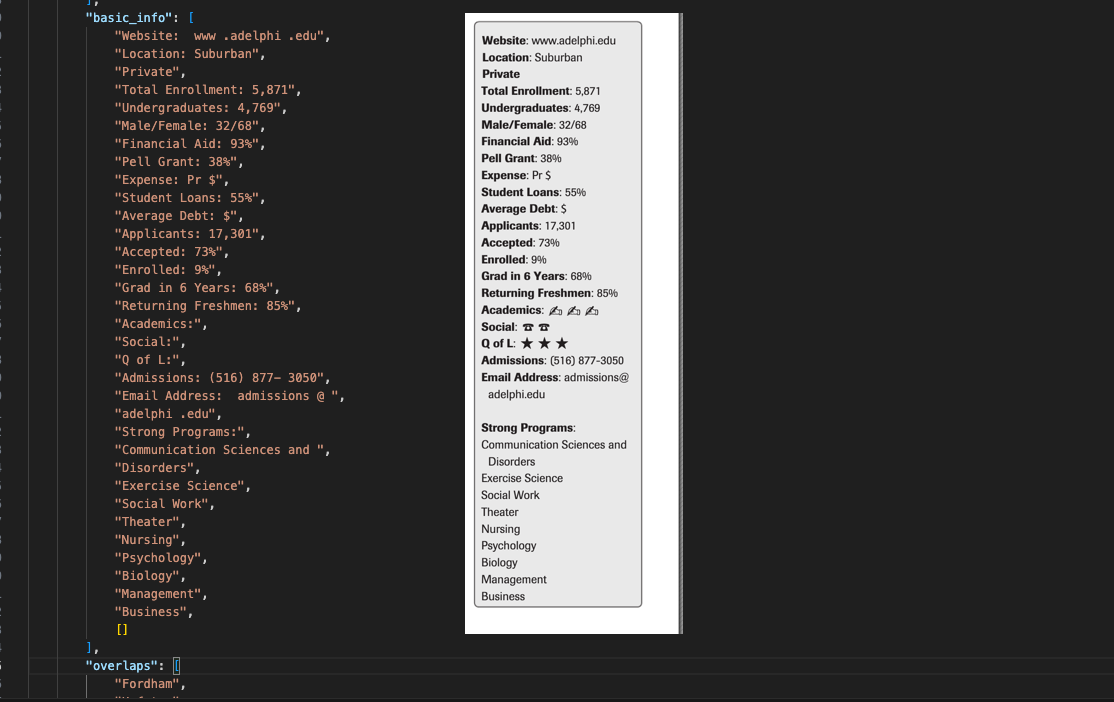
    
4. [x] Agnes Scott College basic info 包含"(continued)",因为被分页了。
5. [x] Alfred University的右上角有'BEST BUY' 标签，没有抽取出来。

### 解析basic info和矫正

In [ ]:
cost_map = {
  "$$$$": {
    "public": "More than $14,000",
    "private": "More than $63,000"
  },
  "$$$": {
    "public": "$12,001–$14,000",
    "private": "$57,001–$63,000"
  },
  "$$": {
    "public": "$9,000–$12,000",
    "private": "$50,000–$57,000"
  },
  "$": {
    "public": "Less than $9,000",
    "private": "Less than $50,000"
  }
}

debt_map = {
  "$$$$": "More than $33,500",
  "$$$": "$28,501–$33,500",
  "$$": "$24,000–$28,500",
  "$": "Less than $24,000"
}

def parse_basic_info(basic_info_json):
    basic_info = {}
    last_key = ""
    last_value = ""
    section = "basic"
    strong_programs = []
    academics = ""
    social = ""
    qol = ""
    email = ""
    for row_raw in basic_info_json:
        if not row_raw: # 空[]跳过
            continue
        row = row_raw.replace("left:", '').split('___left___')[1]
        if row == "(continued)": # 丢弃"(continued)"
            continue
        if ":" in row:
            key = row.split(":")[0]
            value = row.split(":")[1]
            basic_info[key] =  value.strip(" ")
            last_key = key
            if key == "Email Address":
                email = value
            if key == "Website":
                basic_info[key] = value.replace(' ', '') # 剔除空格
            print(f"last key: {key}")
        else:
            if last_key == "Location":
                basic_info["Control Type"]= row
                continue
            if last_key == "Strong Programs":
                strong_programs.append(row_raw) # 这地方记录带left信息的字符串，用于后面做换行合并处理。
            if last_key == "Academics":
                academics += row
                print(f"new academics: {academics}")
            if last_key == "Social":
                social += row
            if last_key == "Q of L":
                qol += row
            if last_key == "Email Address":
                email += row
    basic_info["Strong Programs"]= [s for s in strong_programs if isinstance(s, str)] # 剔除空[]
    basic_info["Academics"]= academics.replace(' - ', '★')
    basic_info["Social"]= social.replace(' %', '★')
    basic_info["Q of L"]= qol.replace('H', '★').replace(' ','')
    basic_info["Email Address"] = email.replace(' ', '') # 剔除空格
    # Expense mapping
    try:
        expense = basic_info["Expense"]
        index = expense.replace("Pub", "").replace("Pr", "").replace(" ","") # 只保留'$'
        control_type = "public" if "Pub" in expense else "private"
        basic_info["Expense Desc"] = cost_map[index][control_type]
        # Average debt mapping
        basic_info["Average Debt Desc"] = debt_map[basic_info["Average Debt"].replace(' ', '')]
    except:
        print(f'Error happened for basic info: {basic_info_json}')
    

    # Strong Program, 换行处理。
    # 有一个program分到2行的情况，需要合并成一行，html分析的时候有保留left信息
    # 合并拆分，在抽取阶段，每一行都被插入了left信息，如果某一行大于前一行的left值，那就是program被分行了。
    # 发现分行则插入一个段落标记'<p>'.
    # 
    # WARNING: 如果某一段只有一行，那么上面的假设就不成立了，分段会失败，算法需要重新写。好消息是目前没有发现这种case。
    #
    # 插标记的代码请搜索下面的内容:
    # elif node_type == NodeType.CONTENT:
    #         self.current_university.content.append(f'left: {self.get_content_left(node)}___left___{node.get_text()}')
    try:
        strong_programs = basic_info["Strong Programs"]
        l = len(strong_programs)
        get_left = lambda row: float(row.split("___left___")[0].split(':')[1])
        remove_left_info = lambda row: row.split("___left___")[1]
        result = []
        result.append(remove_left_info(strong_programs[0]))
        for i in range(1, l):
            last_left = get_left((strong_programs[i - 1]))
            current_left = get_left(strong_programs[i])
            orig_content = remove_left_info(strong_programs[i])
            if current_left > last_left: # 找到缩进
                result.append(f'<continued>{orig_content}')
            else:
                result.append(orig_content)
        
        basic_info["Strong Programs"] = "#".join(result).replace('#<continued>','').split('#') # program名里面可能包含',', 所以不能用','做分隔符
    except:
        print(f'Error while processing strong programs for basic info: {basic_info_json}')

    return basic_info

def parse_reviews(raw_reviews):
    # review format, contains x and y axis info:
    #.   f'xy: ({self.get_content_left(node)},{self.get_node_bottom(node)})___lb___{node.get_text()}'
    # group reviews by bottom space, if the bottom space between each is > 100, then, split it into new group
    get_y = lambda review: float(review.split('___lb___')[0].split(':')[1].replace('(', '').replace(')', '').split(',')[1])
    get_orig = lambda review: review.split('___lb___')[1]
    result = []
    current = get_orig(raw_reviews[0])
    last_y = get_y(raw_reviews[0])

    for i in range(1, len(raw_reviews)):
        current_y = get_y(raw_reviews[i])
        if current_y - last_y > 100:
            # 一段review已经结束
            result.append(current)
            current = get_orig(raw_reviews[i])
        else:
            current += get_orig(raw_reviews[i])
        last_y = current_y
    # 最后一条记录
    result.append(current)
    return result
    
    
    

In [185]:
from enum import Enum, StrEnum

class NodeType(Enum):
    START       = "START"
    TITLE       = "TITLE"
    SHORT_INTRO = "SHORT_INTRO"
    BASIC_INFO  = "BASIC_INFO"
    ADDRESS     = "ADDRESS"
    REVIEW      = "REVIEW"
    REVIEW2     = "REVIEW2"
    CONTENT     = "CONTENT"
    APPLY_TO_TITLE   ="APPLY_TO_TITLE"
    APPLY_TO_CONTENT = "APPLY_TO_CONTENT"
    OVERLAP_TITLE    = "OVERLAP_TITLE"
    OVERLAP_CONTENT  = "OVERLAP_CONTENT"
    STRONG_PROGRAM_TITLE = "STRONG_PROGRAM_TITLE"
    STRONG_PROGRAM   = "STRONG_PROGRAM"
    BOTTOM           = "BOTTOM"
    OTHER            = "OTHER"

  
class University():
    def __init__(self):
        self.name = ""
        self.address = ""
        self.reviews = []
        self.reviews1 = []
        self.reviews2 = []
        self.current_review = []
        self.short_intro = []
        self.basic_info = []
        self.content = []
        self.apply_to = []
        self.overlaps = []
        self.strong_program = []
        self.last_position = NodeType.START

    def __str__(self):
        return f"""
        name: {self.name}
        address: {self.address}
        short_intro: {self.short_intro}
        basic_info: {self.basic_info}
        overlaps: {self.overlaps}
        reviews: {self.reviews}
        apply to: {self.apply_to}
        content: {self.content}
        """
    def formatted_reviews(self):
        reviews1 = parse_reviews(self.reviews1)
        reviews2 = parse_reviews(self.reviews2)
        
        return reviews1 + reviews2
        
    def formatted_applyto(self):
        merged = ["".join(sub) for sub in self.apply_to ]
        return "".join([s for s in merged if s])

    def formatted_content(self):
        if not self.content:
            return self.content
        # 合并拆分，在抽取阶段，每一行都被插入了left信息，如果某一行和前后两行的left值都不一样，那就是新起了一段。也就是如果某一行和上下任何一行左对齐的话就不是新行。
        # 发现新段落则插入一个段落标记'<p>'.
        # 
        # WARNING: 如果某一段只有一行，那么上面的假设就不成立了，分段会失败，算法需要重新写。好消息是目前没有发现这种case。
        #
        # 插标记的代码请搜索下面的内容:
        # elif node_type == NodeType.CONTENT:
        #         self.current_university.content.append(f'left: {self.get_content_left(node)}___left___{node.get_text()}')

        l = len(self.content)
        get_left = lambda row: float(row.split("___left___")[0].split(':')[1])
        remove_left_info = lambda row: row.split("___left___")[1]
        result = []
        result.append(remove_left_info(self.content[0]))
        for i in range(1, l - 1):
            last_left = get_left((self.content[i - 1]))
            current_left = get_left(self.content[i])
            next_left = get_left(self.content[i+1])
            orig_content = remove_left_info(self.content[i])
            if current_left != last_left and current_left != next_left: # 找到新的段落
                result.append(f'<p>{orig_content}')
            else:
                result.append(orig_content)
        # 别弄丢最后一句话

        result.append(self.content[l - 1])
        
        return "".join(result).split("<p>")
        
    def formatted_basic_info(self):
        return parse_basic_info(self.basic_info)
    def formatted_short_intro(self):
        return "".join(self.short_intro)
        
    def to_json(self):
        print(f'formatting unversity to json: {self.name}')
        return {"name": self.name, "address": self.address, "short_intro": self.formatted_short_intro(), 
                "basic_info": self.formatted_basic_info(), 
                # "basic_info_orig": self.basic_info,
                "overlaps": [s.strip() for s in "".join(self.overlaps).split(",")], 
                "reviews": self.formatted_reviews(), "apply_to": self.formatted_applyto(), "content": self.formatted_content()}
        
# 开始遍历所有页面的所有元素
class PageWalker():
    def __init__(self, _style_dict, node_type_analyzer, y_dict = None):
        self.universities = []
        self.current_university = None
        self.current_apply_to_content = []
        self.current_review = []
        self.current_basic_info = []
        self.current_overlap_content = []
        self.last_position = NodeType.START
        self.style_dict = _style_dict
        self.y_dict = y_dict
        self.get_node_type = {"get_node_type1":self.get_node_type1, "get_node_type2": self.get_node_type2}[node_type_analyzer]
        
    def walk(self):
        for p in self.pages: # pdf由很多'pf' div组成，每个'pf' div试一个页面。
            walk_page(p)

    # Node type: TITLE, ADDRESS, CONTENT, REVIEW, APPLY_TO_TITLE, APPLY_TO_CONTENT, 
    # OVERLAP_TITLE, OVERLAP_CONTENT
    # BASIC_INFO, STRONG_PROGRAM, BOTTOM,
    # OTHER
    # This method is dedicated to "fiske_new_york_university.html"
    def get_node_type1(self, node):
        classes = node.get('class', [])

        if 'fs2' in classes: # u_name = $x("//div[contains(@class, 'fs2')]")
            return NodeType.TITLE;
            
        # 页脚白色
        if 'fc0' in classes: # bottoms = $x("//div[contains(@class, 'fc0')]/text()"), title也是白色不过title会在第一个if句里面过滤掉.
            return NodeType.BOTTOM

        
        # basic ifno里面的特殊字符
        text = node.get_text()
        # 1. Academics 评分
        if len(text) > 0 and text.replace(" - ", "").replace(" ", "") == "":
            return NodeType.BASIC_INFO
        # 2. Social
        if len(text) > 0 and text.replace(" %", "") == "":
            return NodeType.BASIC_INFO
        # 3. Social
        if len(text) > 0 and text == "H":
            return NodeType.BASIC_INFO
            
        # 节点判断规则
        # 第一优先级，判断left属性和bottom属性，靠左的和靠右的属于侧边内容，包含basic info和reviews
        # left < 94.5和left > 660的都属于侧边栏内容
        is_in_sidebar = False
        
        for cls in classes:
            if cls in left_dict:
                left = self.style_dict[cls]
                if left < 94.5 or left > 660:
                    is_in_sidebar = True
                    print(f"This node is in sidebar with {cls} left {left} :{node.get_text()}")
                    
        # 左右边栏的内容
        if is_in_sidebar:
            if 'fs5' in classes and 'fc1' in classes and node.get_text() == "Strong Programs": # Strong Programs开始.
                return NodeType.STRONG_PROGRAM_TITLE
            if 'fs5' in classes and 'fc1' in classes: # 这个条件会把reviews也包括进来，但是因为review在前面已经精准判断了，优先级高，所以不会漏到这里来。
                # 这个basic info因为包含很多评级信息，里面包含有各种评分的符号，字体变化多端。
                # TODO: basic info 和 storng program样式一样, 先都当 basic info处理，后期再用AI做进一步处理。
                return NodeType.BASIC_INFO
                return NodeType.STRONG_PROGRAM
            if 'fs8' in classes and node.get_text() == "Overlaps":
                return NodeType.OVERLAP_TITLE
            if 'fs7' in classes and 'fc1' in classes and 'hd' in classes:
                return NodeType.OVERLAP_CONTENT
            
        # 其它的归于第二优先级， 
        if 'fs3' in classes and 'h4' in classes:
            return NodeType.ADDRESS
        if 'fc1' in classes and 'fs0' in classes and 'h1' in classes: # reviews = $x("//div[contains(@class, 'fs0') and contains(@class, 'fc1')]/text()")
            return NodeType.REVIEW
        if 'fc1' in classes and  'fs7' in classes and 'hb' in classes: # reviews = $x("//div[contains(@class, 'fs0') and contains(@class, 'fc1')]/text()")
            return NodeType.REVIEW2
        if 'fs4' in classes and 'fc1' in classes and 'h5' in classes and 'x4' in classes: # SHORT_INTRO和APPLY_TO_CONTENT容易重叠，用left class x4来区分。x4 for short intro, x3 for apply_to
            return NodeType.SHORT_INTRO
        if 'fs4' in classes and 'fc1' in classes and 'h6' in classes:
            return NodeType.CONTENT
        if 'fs8' in classes and 'x3' in classes: # Another way is check the string
            return NodeType.APPLY_TO_TITLE
        if 'fs4' in classes and 'fc1' in classes and 'x3' in classes:
            return NodeType.APPLY_TO_CONTENT
        return NodeType.OTHER

    # lex for Fiske_stripped_pages.html
    def get_node_type2(self, node):
        classes = node.get('class', [])

        if 'fs2' in classes: # u_name = $x("//div[contains(@class, 'fs2')]")
            return NodeType.TITLE;
            
        # 页脚白色
        if 'fc0' in classes: # bottoms = $x("//div[contains(@class, 'fc0')]/text()"), title也是白色不过title会在第一个if句里面过滤掉.
            return NodeType.BOTTOM

        # basic ifno里面的特殊字符
        text = node.get_text()
        # 1. Academics 评分
        if len(text) > 0 and text.replace(" - ", "").replace(" ", "") == "":
            return NodeType.BASIC_INFO
        # 2. Social
        if len(text) > 0 and text.replace(" %", "") == "":
            return NodeType.BASIC_INFO
        # 3. Social
        if len(text) > 0 and text == "H":
            return NodeType.BASIC_INFO
            
        # 节点判断规则
        # 第一优先级，判断left属性和bottom属性，靠左的和靠右的属于侧边内容，包含basic info和reviews
        # left < 94.5和left > 660的都属于侧边栏内容
        is_in_sidebar = False
        
        for cls in classes:
            if cls in self.style_dict:
                left = self.style_dict[cls]
                if left < 94 or left > 660:
                    is_in_sidebar = True
                    print(f"This node is in sidebar with {cls} left {left} :{node.get_text()}")
                    
        # 左右边栏的内容
        if is_in_sidebar:
            if 'fs5' in classes and 'fc1' in classes and node.get_text() == "Strong Programs": # Strong Programs开始.
                return NodeType.STRONG_PROGRAM_TITLE
            if 'fs5' in classes and 'fc1' in classes: # 这个条件会把reviews也包括进来，但是因为review在前面已经精准判断了，优先级高，所以不会漏到这里来。
                # 这个basic info因为包含很多评级信息，里面包含有各种评分的符号，字体变化多端。
                # TODO: basic info 和 storng program样式一样, 先都当 basic info处理，后期再用AI做进一步处理。
                return NodeType.BASIC_INFO
                return NodeType.STRONG_PROGRAM
            if 'fs8' in classes and node.get_text() == "Overlaps":
                return NodeType.OVERLAP_TITLE
            if 'fs7' in classes and 'fc1' in classes and 'hd' in classes:
                return NodeType.OVERLAP_CONTENT
            
        # 其它的归于第二优先级， 
        if 'fs3' in classes and 'h4' in classes:
            return NodeType.ADDRESS
        if 'fc1' in classes and 'fs0' in classes and 'h1' in classes: # reviews = $x("//div[contains(@class, 'fs0') and contains(@class, 'fc1')]/text()")
            return NodeType.REVIEW
        if 'fc1' in classes and  'fs7' in classes and 'hb' in classes: # reviews = $x("//div[contains(@class, 'fs0') and contains(@class, 'fc1')]/text()")
            return NodeType.REVIEW2
        if 'fs4' in classes and 'fc1' in classes and 'h5' in classes and ('x4' in classes or 'x16' in classes): # SHORT_INTRO和APPLY_TO_CONTENT容易重叠，用left class来区分。'x4'和'x16'都能标记short intro, x4左对齐, x16代表左边有侧栏的情况。
            return NodeType.SHORT_INTRO
        if 'fs4' in classes and 'fc1' in classes and 'h6' in classes:
            return NodeType.CONTENT
        if 'fs8' in classes and 'x3' in classes: # Another way is check the string
            return NodeType.APPLY_TO_TITLE
        if 'fs4' in classes and 'fc1' in classes: # TODO: 这地方保险起见应该判断left的值范围，left [53,55]之间算是apply to content
            return NodeType.APPLY_TO_CONTENT
        return NodeType.OTHER
    
    def university_completed(self):
        if not self.current_university:
            print(f"前面没有发现university, 直接返回.")
            return
        university = self.current_university
        university.reviews.append(self.current_review)
        self.current_review = []
        university.basic_info.append(self.current_basic_info)
        self.current_basic_info = []
        university.apply_to.append(self.current_apply_to_content)
        self.current_apply_to_content = []
        university.overlaps = self.current_overlap_content
        self.current_overlap_content = []
        print(f'{"*" * 10} university build completed: {university.name}')

    def start(self, pages):
        for page in pages:
            self.walk_page(page)

    def get_content_left(self, node):
        classes = node.get('class', [])
        for cls in classes:
            if cls in self.style_dict:
                return self.style_dict[cls]

    def get_node_bottom(self, node):
        classes = node.get('class', [])
        for cls in classes:
            if cls in self.y_dict:
                return self.y_dict[cls] 
                
    # 解析DIV pf 里面的内容, 解析第一个pc就可以了，第二个div是pi，应该是一个外框
    def walk_page(self, page):
        content = list(page.children)[0]

        # 有些页面元素不按y值排序，有乱序的现象，导致解析错位，一个大学的信息解析到别的大学里面去。
        # 解决办法是给页面元素排序， 按y值排序.
        children = [child for child in content.children]
        if self.y_dict:
            children = sorted(children, key=lambda node: int(self.get_node_bottom(node)), reverse = True)
            # print(f'sorted children: {children}')

        # 开始处理
        for child in children:
            # 剔除页脚, "Fiske Guide to Colleges 2025 NEW YORK UNIVERSITY 493"
            node = child
            node_type = self.get_node_type(child)
            # 1. 预处理
            # 如果node_type发生了变化，需要结束上一个状态,做收尾处理。
            # 排序以后这段逻辑不工作了，因为会有content和review交错，last_position失效了，结果就是区块划分失效，每一行单独成为一个review了。
            # 替代方案, 把left, bottom信息记录到review里面，后期做进一步处理。
            # if self.last_position == NodeType.REVIEW and node_type != NodeType.REVIEW:
            #     self.current_university.reviews.append(self.current_review)
            #     self.current_review = []
            # if self.last_position == NodeType.REVIEW2 and node_type != NodeType.REVIEW2:
            #     self.current_university.reviews.append(self.current_review)
            #     self.current_review = []

            # 2. 
            if node_type == NodeType.TITLE:
                # 1. "Scripps College: See page 156.", 这种无效的university name, 直接跳过
                # 2. St. John’s University and College of St. Benedict: 这种换行了的，也直接跳过
                #    See page 608.

                if "See page " in node.get_text() or ":" in node.get_text():
                    print(f"Skipping university for it is a refer text: {node.get_text()}")
                    continue;
                # 了结上一个循环，开始新的循环
                self.university_completed()
                if self.current_university:
                    self.universities.append(self.current_university)
                self.current_university = University()
                self.current_university.name = node.get_text()
                print(f"Found university of name {node.get_text()}")
            elif node_type == NodeType.ADDRESS:
                print(f'Found address: {node.get_text()}')
                self.current_university.address = node.get_text()
            elif node_type == NodeType.SHORT_INTRO:
                self.current_university.short_intro.append(node.get_text())
            elif node_type == NodeType.CONTENT:
                # print(node)
                self.current_university.content.append(f'left: {self.get_content_left(node)}___left___{node.get_text()}')
            elif node_type == NodeType.REVIEW:
                self.current_university.reviews1.append(f'xy: ({self.get_content_left(node)},{self.get_node_bottom(node)})___lb___{node.get_text()}')
            elif node_type == NodeType.REVIEW2:
                self.current_university.reviews2.append(f'xy: ({self.get_content_left(node)},{self.get_node_bottom(node)})___lb___{node.get_text()}')
            elif node_type == NodeType.APPLY_TO_TITLE:
                pass
            elif node_type == NodeType.APPLY_TO_CONTENT:
                self.current_apply_to_content.append(node.get_text())
            elif node_type == NodeType.OVERLAP_TITLE:
                pass
            elif node_type == NodeType.OVERLAP_CONTENT:
                self.current_overlap_content.append(node.get_text())
            elif node_type == NodeType.BASIC_INFO:
                self.current_university.basic_info.append(f'left: {self.get_content_left(node)}___left___{node.get_text()}')
            elif node_type == NodeType.STRONG_PROGRAM_TITLE:
                pass
            elif node_type == NodeType.STRONG_PROGRAM:
                self.current_university.strong_program.append(f'left: {self.get_content_left(node)}___left___{node.get_text()}')
            elif node_type == NodeType.BOTTOM:
                pass
            else:
                print(f'Unknown node found: {node.get_text()}')

            self.last_position = node_type
   

In [ ]:
with open('./nyu_ydict.json') as f:
    nyu_ydict = json.load(f)        
pw = PageWalker(left_dict, "get_node_type1", nyu_ydict)
pw.start(pages)
pw.university_completed()

with open("new_york_university.json", 'w') as f:
    json.dump(pw.current_university.to_json(), f, indent=4, ensure_ascii=False)
print(pw.current_university) 
print("************************")
print(pw.universities)

# 后期处理
## 1. 解析和矫正basic info

In [ ]:
nyu_json = pw.current_university.to_json()

In [ ]:

    
basic_info = parse_basic_info(nyu_json["basic_info"])

In [ ]:
basic_info

In [ ]:
a = ""
a += "b"
a

In [ ]:
with open('./bottom_style_dict.json') as f:
    y_dict = json.load(f)
pw2 = PageWalker(all_style_dict, "get_node_type2", y_dict)
pw2.start(all_pages)
pw2.university_completed()
pw2.universities.append(pw2.current_university)

all_u_json = [u.to_json() for u in pw2.universities[1:]]
with open('all_fiske_universities.json', 'w') as f:
    json.dump(all_u_json, f, indent=4, ensure_ascii=False)

In [ ]:
sorted([9,1,3,4,8,5])

# 添加primary key

1. 数据导入的时候学校名需要和productname.general_college_tu里的`primary_key_apply7`匹配，里面有6284所学校。有61所学校名字匹配不上。
2. 如果匹配不上，可以用AI做二次匹配。能匹配30个。
3. 

In [189]:
with open('all_fiske_universities.json') as f:
    all = json.load(f)

with open('fiske_name_to_primary_key_dict.json') as f:
    name_primary_map = json.load(f)
    
for u in all:
    name = u["name"]
    # 默认所有的都能匹配上，直接把name设置为primary, 实际上有61条primary key是不对的。
    u["primary_key_apply7"] = name
    
    # 覆盖匹配不上的
    if name in name_primary_map:
        print(f'Overwritting {name} => {name_primary_map[name]}')
        u["primary_key_apply7"] = name_primary_map[name]


with open('all_fiske_universities_mapped.json', 'w') as f:
    json.dump(all, f, indent=4, ensure_ascii=False)
        

    

Overwritting Agnes Scott College => 
Overwritting Antioch College => Antioch University New England
Overwritting College of the Atlantic => 
Overwritting Austin College => 
Overwritting Bennington College => 
Overwritting UC Los Angeles => University of California, Los Angeles (UCLA)
Overwritting UC Santa Barbara => University of California, Santa Barbara (UCSB)
Overwritting Case Western Reserve => Case Western Reserve University
Overwritting Colgate University => 
Overwritting The Cooper Union => 
Overwritting University of Dallas => 
Overwritting Deep Springs College => 
Overwritting Eugene Lang College of Liberal Arts => 
Overwritting The Evergreen State College => 
Overwritting Furman University => 
Overwritting The George Washington University => George Washington University
Overwritting Hampden– Sydney  College => Hampden-Sydney College
Overwritting Hartwick College => 
Overwritting University of Hawai‘i at Mānoa => University of Hawaiʻi at Mānoa
Overwritting Hendrix College => 
